----

## Introducion proyecto

Se tiene informacion del departament analitico de Y.Afisha en el cual se optimizara los resultados de los gastos de marketing dado los datos sobre las visitar de los usuarios, las fechas que comienzan a comprar, entre otros. Es asi que se analizara el comportamiento sobre todas estas metricas





###  Preprocesamiento de datos


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Importacion de las bases de datos

visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

In [3]:
# Preprocesamiento de datos
visits.info()
print()

orders.info()
print()

costs.info()

print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  

In [4]:
#Conversion de tipos de datos
visits['End Ts'] = pd.to_datetime(visits['End Ts'])

visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

visits.info()

orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


En la base de datos visits las columnas End Ts y Start Ts   se cambian a tipo fecha y en la base de datos orders info de igual forma sse cambia la columna Buy Ts a tipo fecha

### Paso 2 Informes y  métricas 



#### Visitas:

##### ¿Cuántas personas lo usan cada día, semana y mes? 

DAU: 907.9917582417582


<Figure size 1000x600 with 0 Axes>

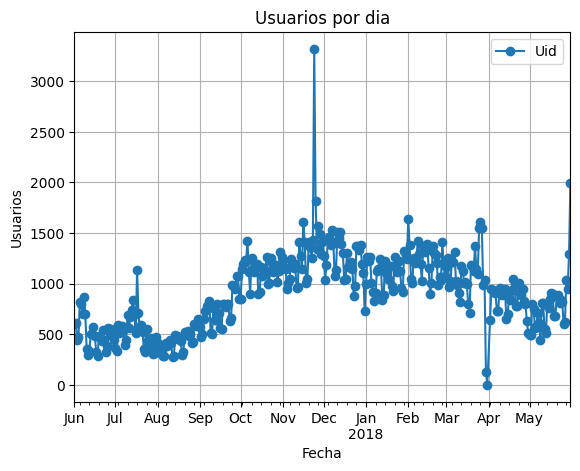

In [5]:
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

visits['usuarios por dia'] = visits['Start Ts'].dt.to_period('D')

users_per_day = visits.groupby('usuarios por dia').agg({'Uid': 'nunique'})

dau_mean = users_per_day.mean()

print('DAU:', dau_mean[0])

# 
plt.figure(figsize=(10, 6))
users_per_day.plot(kind='line', marker='o', linestyle='-')
plt.title('Usuarios por dia')
plt.xlabel('Fecha')
plt.ylabel('Usuarios')
plt.grid(True)
plt.show()

WAU Uid    5716.245283
dtype: float64
WAU: 907.9917582417582


<Figure size 1000x600 with 0 Axes>

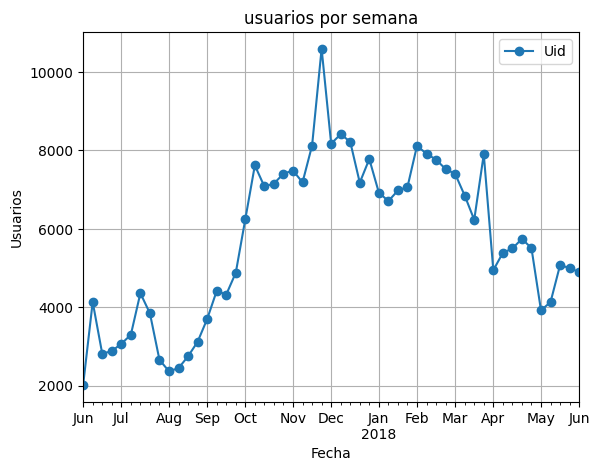

In [6]:
#Numero de personas por semana

visits['usuarios por semana']= visits['Start Ts'].dt.to_period('w')

users_per_week = visits.groupby('usuarios por semana').agg({'Uid':'nunique'}).mean()


print('WAU', users_per_week)




visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

visits['usuarios por semana'] = visits['Start Ts'].dt.to_period('w')

users_per_week = visits.groupby('usuarios por semana').agg({'Uid': 'nunique'})

wau_mean = users_per_day.mean()

print('WAU:', wau_mean[0])

# 
plt.figure(figsize=(10, 6))
users_per_week.plot(kind='line', marker='o', linestyle='-')
plt.title('usuarios por semana')
plt.xlabel('Fecha')
plt.ylabel('Usuarios')
plt.grid(True)
plt.show()

MAU: 23228.416666666668


<Figure size 1000x600 with 0 Axes>

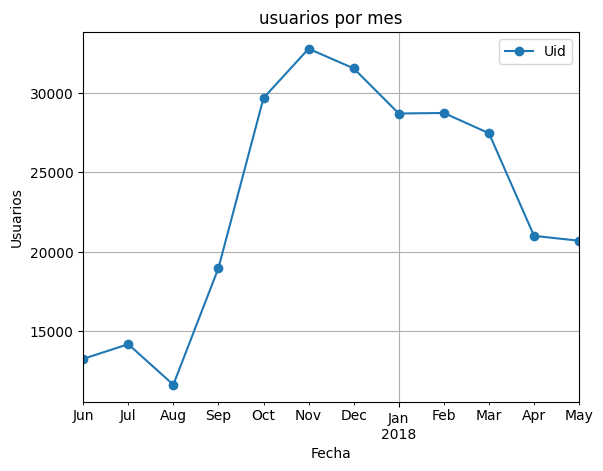

In [7]:
#Numero de personas por mes

visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

visits['usuarios por mes'] = visits['Start Ts'].dt.to_period('m')

users_per_month = visits.groupby('usuarios por mes').agg({'Uid': 'nunique'})

mau_mean = users_per_month.mean()

print('MAU:', mau_mean[0])

# 
plt.figure(figsize=(10, 6))
users_per_month.plot(kind='line', marker='o', linestyle='-')
plt.title('usuarios por mes')
plt.xlabel('Fecha')
plt.ylabel('Usuarios')
plt.grid(True)
plt.show()


##### ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).

                  sesiones_dia  usuarios
usuarios por dia                        
2017-06-01                 664       605
2017-06-02                 658       608
2017-06-03                 477       445
2017-06-04                 510       476
2017-06-05                 893       820
...                        ...       ...
2018-05-27                 672       620
2018-05-28                1156      1039
2018-05-29                1035       948
2018-05-30                1410      1289
2018-05-31                2256      1997

[364 rows x 2 columns]


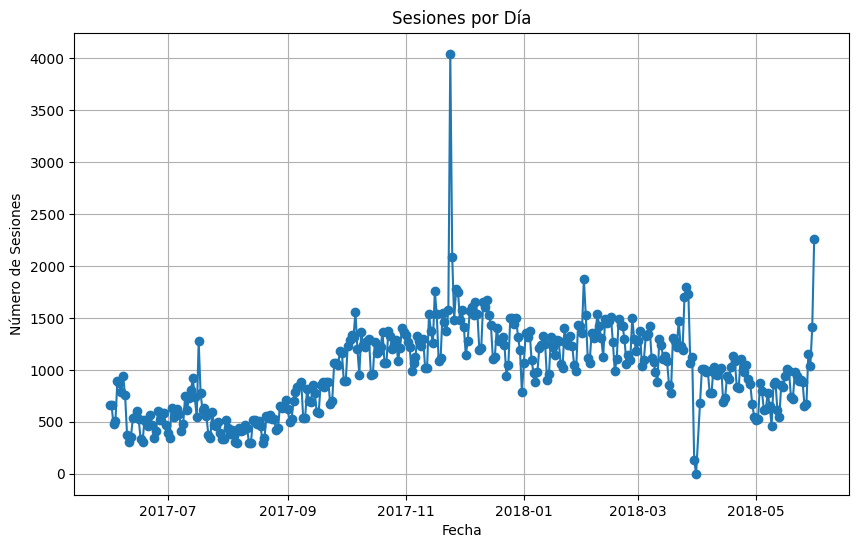

In [8]:

visits['usuarios por dia'] = visits['Start Ts'].dt.date

sesiones_por_dia = visits.groupby(['usuarios por dia']).agg({'Uid': ['count', 'nunique']})

sesiones_por_dia.columns= ['sesiones_dia','usuarios']

print(sesiones_por_dia)


plt.figure(figsize=(10, 6))
sesiones_por_dia['sesiones_dia'].plot(kind='line', marker='o', linestyle='-')
plt.title('Sesiones por Día')
plt.xlabel('Fecha')
plt.ylabel('Número de Sesiones')
plt.grid(True)
plt.show()



#####  ¿Cuál es la duración de cada sesión?

0    60
dtype: int64


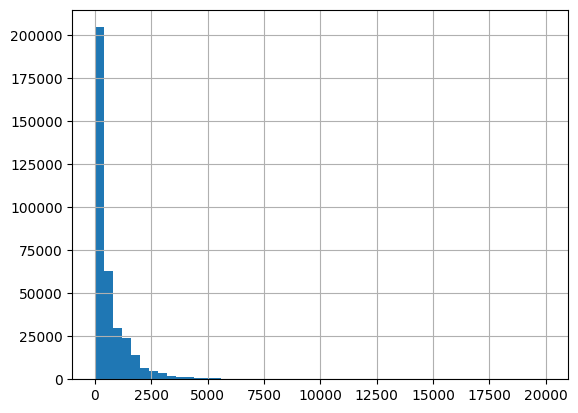

In [9]:
#Promedio de duracion de las sesiones
visits['duracion sesion'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds

visits['duracion sesion'].hist(range=(0,20000), bins=50)

print(visits['duracion sesion'].mode())



Se puede apreciar en la grafica que no se tiene una distribucion normal en las duracion de sesiones por lo que se toma la moda para saber cual es la duracion que tienden, en este caso son 60 s

#####  ¿Con qué frecuencia los usuarios y las usuarias regresan?

In [10]:
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])


usuarios_diarios = visits.groupby(visits['Start Ts'].dt.date)['Uid'].nunique()


usuarios_semanales = visits.groupby(visits['Start Ts'].dt.to_period('W'))['Uid'].nunique()


usuarios_mensuales = visits.groupby(visits['Start Ts'].dt.to_period('M'))['Uid'].nunique()


sticky_wau = usuarios_diarios.mean() / usuarios_semanales.mean()
sticky_mau = usuarios_diarios.mean() / usuarios_mensuales.mean()

print("Sticky Factor WAU:")
print(sticky_wau)

print("Sticky Factor MAU:")
print(sticky_mau)





Sticky Factor WAU:
0.1588440861589881
Sticky Factor MAU:
0.03908969652437603


### Ventas

#### ¿Cuándo la gente empieza a comprar?

,Uid,Start Ts,Buy Ts,Tiempo de compra
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0
...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-11-24 09:03:00,95
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00,0
36520,18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00,231
36521,18446156210226471712,2017-11-07 10:01:00,2018-02-18 19:34:00,103


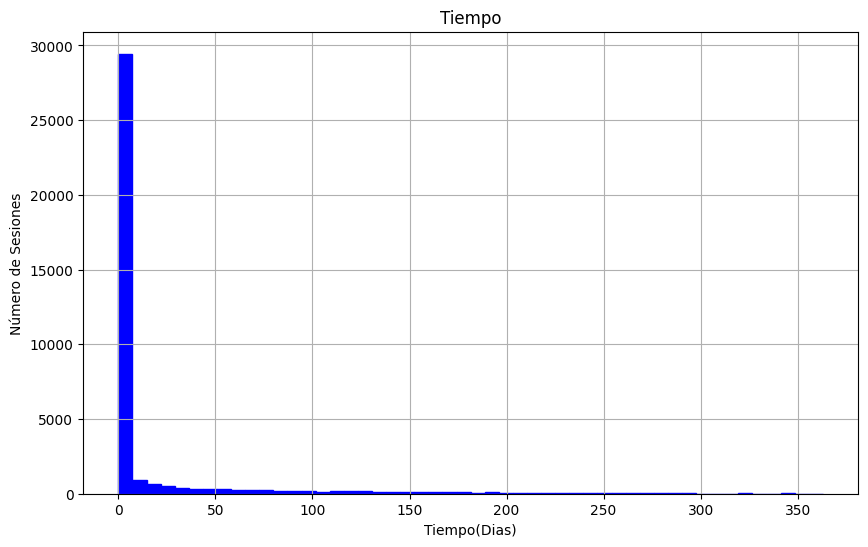

,Uid
Tiempo de compra,
0,26363
1,1011
2,563
3,434
4,324
...,...
354,1
355,3
357,4


In [11]:


registro = visits.groupby('Uid')['Start Ts'].min().reset_index()

primeracompra = orders.groupby('Uid')['Buy Ts'].min().reset_index()




Tiempo_registro_compra = merged_data = pd.merge(registro, primeracompra, on='Uid')

Tiempo_registro_compra['Tiempo de compra'] = (Tiempo_registro_compra['Buy Ts'] - Tiempo_registro_compra['Start Ts']).dt.days



display(Tiempo_registro_compra)



plt.figure(figsize=(10, 6))
plt.hist(Tiempo_registro_compra['Tiempo de compra'], bins=50, color='blue', edgecolor='blue')
plt.title('Tiempo')
plt.xlabel('Tiempo(Dias)')
plt.ylabel('Número de Sesiones')
plt.grid(True)
plt.show()

Tiempo_compra = Tiempo_registro_compra.pivot_table(index='Tiempo de compra', values='Uid', aggfunc='count')

display(Tiempo_compra)

Se puede ver que practicamente la mayoria de usuarios compran el mismo dia ya que 26363 se espera 0 dias para realizar la primera compra

#### ¿Cuántos pedidos hacen durante un período de tiempo dado? 





,Fecha,Cantidad
0,2017-06,2354
1,2017-07,2363
2,2017-08,1807
3,2017-09,3387
4,2017-10,5679
5,2017-11,5659
6,2017-12,6218
7,2018-01,4721
8,2018-02,5281
9,2018-03,5326


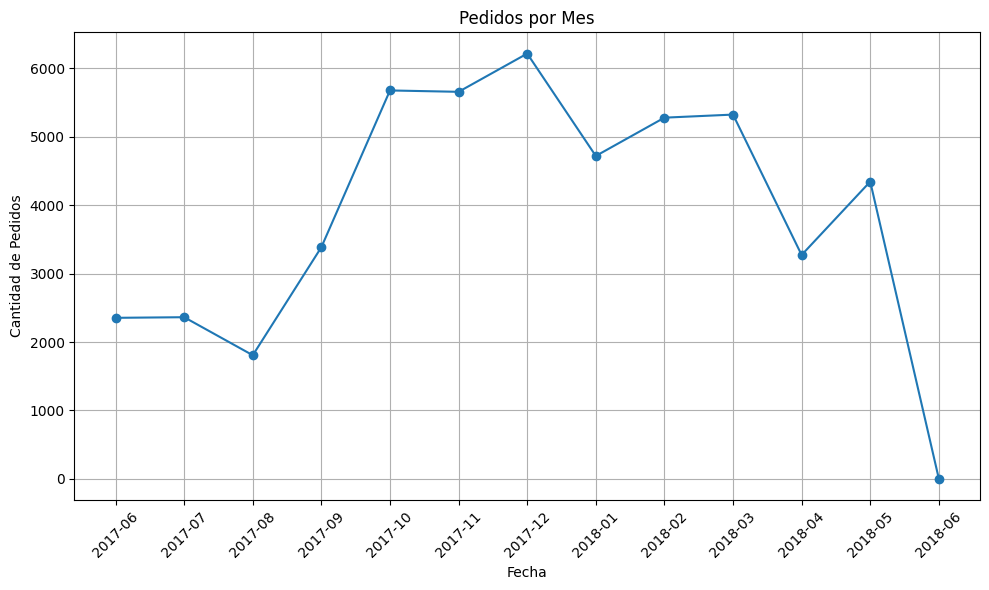

In [12]:


primera_orden = orders['Buy Ts'].min()
ultima_orden = orders['Buy Ts'].max()

orders['pedidos_por_mes'] = orders['Buy Ts'].dt.to_period('M')

pedidos_por_mes = orders['pedidos_por_mes'].value_counts().sort_index().reset_index()
pedidos_por_mes.columns = ['Fecha', 'Cantidad']

display(pedidos_por_mes)

plt.figure(figsize=(10, 6))
plt.plot(pedidos_por_mes['Fecha'].astype(str), pedidos_por_mes['Cantidad'], marker='o')
plt.title('Pedidos por Mes')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pedidos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



Los meses donde hay una mayor cantidad de pedidos es entre los meses de octubre y diciembre del 2017 con mas de 5500 pedidos cada uno

####  ¿Cuál es el tamaño promedio de compra?
    

In [13]:
tamano_promedio_compra = orders['Revenue'].mean()
    
print('Tamano promedio de compra', tamano_promedio_compra) 
    

Tamano promedio de compra 4.999646930477041


#### ¿Cuánto dinero traen? (LTV)

In [14]:

orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

# Crear las columnas 'primer_pedido_mes' y 'mes_orden'
orders['primer_pedido_mes'] = orders.groupby('Uid')['Buy Ts'].transform('min').dt.to_period('M')
orders['mes_orden'] = orders['Buy Ts'].dt.to_period('M')

# Calcular el tamaño de la cohorte
cohort_size = orders.groupby('primer_pedido_mes').agg({'Uid': 'nunique'}).reset_index()
cohort_size.rename(columns={'Uid': 'cohort_size'}, inplace=True)

# Unir el tamaño de la cohorte al DataFrame 'orders'
orders = pd.merge(orders, cohort_size, on='primer_pedido_mes')

# Calcular las métricas agregadas
order_cohort = orders.groupby(['primer_pedido_mes', 'mes_orden']).agg({'Revenue': 'sum', 'cohort_size': 'first'}).reset_index()


print(order_cohort)

   primer_pedido_mes mes_orden   Revenue  cohort_size
0            2017-06   2017-06   9557.49         2023
1            2017-06   2017-07    981.82         2023
2            2017-06   2017-08    885.34         2023
3            2017-06   2017-09   1931.30         2023
4            2017-06   2017-10   2068.58         2023
..               ...       ...       ...          ...
74           2018-03   2018-05   1114.87         3533
75           2018-04   2018-04  10600.69         2276
76           2018-04   2018-05   1209.92         2276
77           2018-05   2018-05  13925.76         2988
78           2018-06   2018-06      3.42            1

[79 rows x 4 columns]


In [15]:
# Se agrega el ingreso promedio por persona

order_cohort['revenue_per_user'] = order_cohort['Revenue'] / order_cohort['cohort_size']

# Mostrar el DataFrame resultante
print(order_cohort)

# Calcular y mostrar la media de revenue_per_user
print(order_cohort['revenue_per_user'].mean())

   primer_pedido_mes mes_orden   Revenue  cohort_size  revenue_per_user
0            2017-06   2017-06   9557.49         2023          4.724414
1            2017-06   2017-07    981.82         2023          0.485329
2            2017-06   2017-08    885.34         2023          0.437637
3            2017-06   2017-09   1931.30         2023          0.954671
4            2017-06   2017-10   2068.58         2023          1.022531
..               ...       ...       ...          ...               ...
74           2018-03   2018-05   1114.87         3533          0.315559
75           2018-04   2018-04  10600.69         2276          4.657597
76           2018-04   2018-05   1209.92         2276          0.531599
77           2018-05   2018-05  13925.76         2988          4.660562
78           2018-06   2018-06      3.42            1          3.420000

[79 rows x 5 columns]
1.1496394920238058


In [16]:
# Se obtiene el tiempo de vida de los cohorte

#order_cohort['cohort_age'] = (order_cohort['mes_orden'].dt.to_timestamp() - order_cohort['primer_pedido_mes'].dt.to_timestamp()).astype('timedelta64[M]')


order_cohort['mes_orden'] = order_cohort['mes_orden'].dt.to_timestamp()

order_cohort['primer_pedido_mes'] = order_cohort['primer_pedido_mes'].dt.to_timestamp()

# Asegurarse de que las columnas sean tipo datetime
order_cohort['mes_orden'] = pd.to_datetime(order_cohort['mes_orden'])
order_cohort['primer_pedido_mes'] = pd.to_datetime(order_cohort['primer_pedido_mes'])

# Calcular la edad del cohorte en meses redondeada al número entero más cercano
order_cohort['cohort_age'] = ((order_cohort['mes_orden'] - order_cohort['primer_pedido_mes']) / np.timedelta64(1, 'M')).round().astype(int)


print(order_cohort)

order_cohort.info()
order_cohort['cohort_age'] = order_cohort['cohort_age']





   primer_pedido_mes  mes_orden   Revenue  cohort_size  revenue_per_user  \
0         2017-06-01 2017-06-01   9557.49         2023          4.724414   
1         2017-06-01 2017-07-01    981.82         2023          0.485329   
2         2017-06-01 2017-08-01    885.34         2023          0.437637   
3         2017-06-01 2017-09-01   1931.30         2023          0.954671   
4         2017-06-01 2017-10-01   2068.58         2023          1.022531   
..               ...        ...       ...          ...               ...   
74        2018-03-01 2018-05-01   1114.87         3533          0.315559   
75        2018-04-01 2018-04-01  10600.69         2276          4.657597   
76        2018-04-01 2018-05-01   1209.92         2276          0.531599   
77        2018-05-01 2018-05-01  13925.76         2988          4.660562   
78        2018-06-01 2018-06-01      3.42            1          3.420000   

    cohort_age  
0            0  
1            1  
2            2  
3            3  
4 

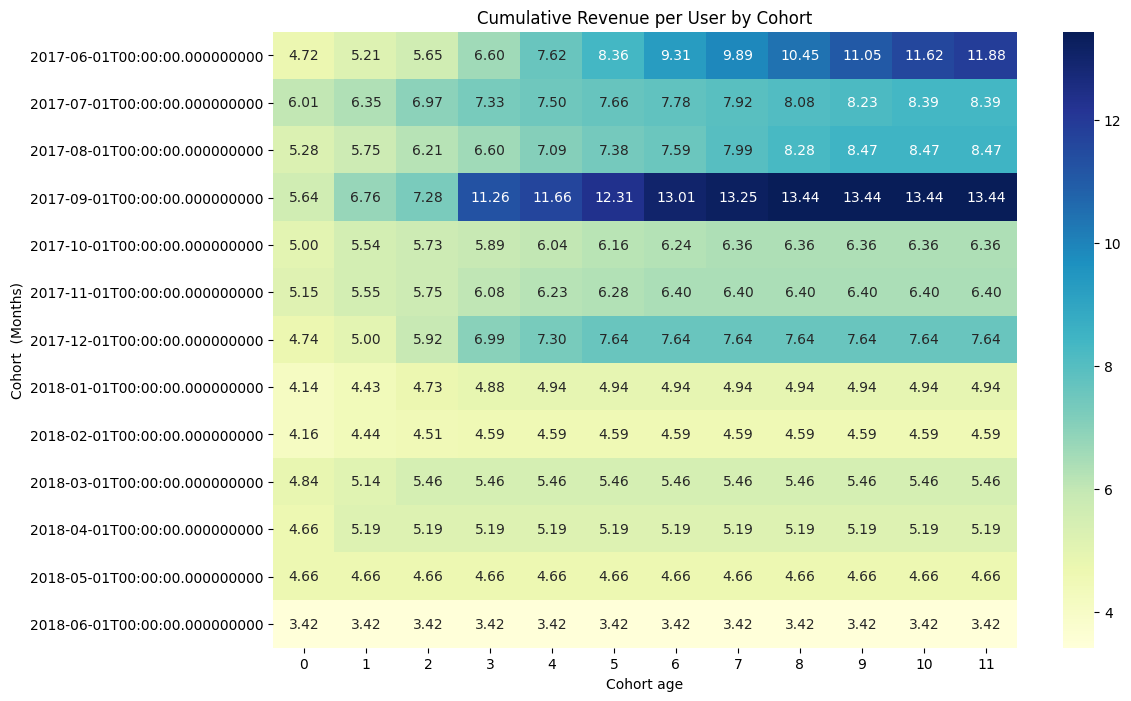

In [17]:

cohort_pivot = order_cohort.pivot_table(index='primer_pedido_mes', columns='cohort_age', values='revenue_per_user', aggfunc='sum')

cohort_pivot = cohort_pivot.fillna(0)

cohort_pivot_cum = cohort_pivot.cumsum(axis=1)




plt.figure(figsize=(12, 8))
sns.heatmap(cohort_pivot_cum, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Cumulative Revenue per User by Cohort')
plt.xlabel('Cohort age')
plt.ylabel('Cohort  (Months)')
plt.show()


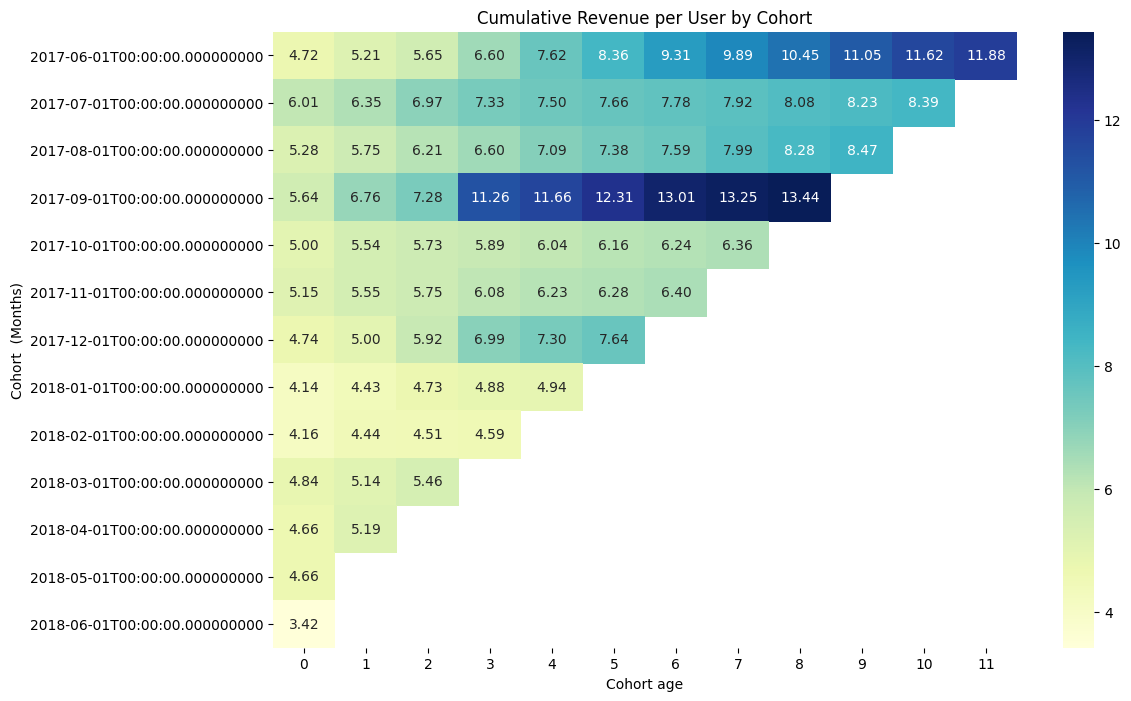

In [18]:

|#CÓDIGO REVISOR
cohort_pivot2 = (
    order_cohort
    .pivot_table(index='primer_pedido_mes', columns='cohort_age', values='revenue_per_user', aggfunc='sum')
    .cumsum(axis=1)
    .round(2)
    
)


plt.figure(figsize=(12, 8))
sns.heatmap(cohort_pivot2, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Cumulative Revenue per User by Cohort')
plt.xlabel('Cohort age')
plt.ylabel('Cohort  (Months)')
plt.show()

### Marketing

#### ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)

In [19]:
# Costos totales por mes
costs['month']= costs['dt'].astype('datetime64[M]')
costos_mensual= costs.groupby('month').agg({'costs':'sum'}).reset_index()
print(costos_mensual)



        month     costs
0  2017-06-01  18015.00
1  2017-07-01  18240.59
2  2017-08-01  14790.54
3  2017-09-01  24368.91
4  2017-10-01  36322.88
5  2017-11-01  37907.88
6  2017-12-01  38315.35
7  2018-01-01  33518.52
8  2018-02-01  32723.03
9  2018-03-01  30415.27
10 2018-04-01  22289.38
11 2018-05-01  22224.27


Gasto por fuente de adquisición:
source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64


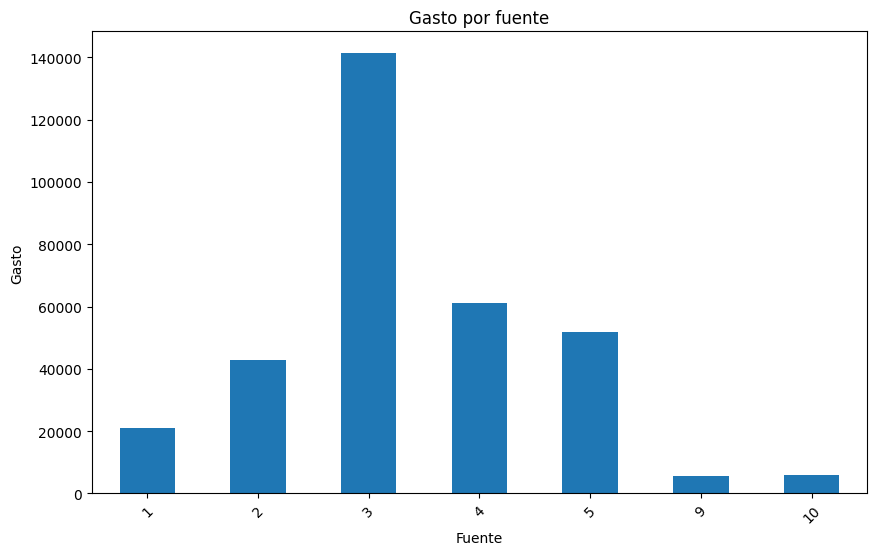

In [20]:
#Por fuente
#Calcular el gasto total
costs['dt'] = pd.to_datetime(costs['dt'])


costs['Month'] = costs['dt'].dt.to_period('M')


gastos_fuentes = costs.groupby('source_id')['costs'].sum()


print("Gasto por fuente de adquisición:")
print(gastos_fuentes)


plt.figure(figsize=(10, 6))
gastos_fuentes.plot(kind='bar',)
plt.xlabel('Fuente')
plt.ylabel('Gasto')
plt.title('Gasto por fuente')
plt.xticks(rotation=45)
plt.show()

#### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?


In [21]:

visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

visits['fecha'] = visits['Start Ts'].dt.date

primera_visita = visits.sort_values(by='Start Ts').groupby('Uid').first().reset_index()

primera_visita = primera_visita[primera_visita['Uid'].isin(orders['Uid'].unique())]

clientes_fuente = primera_visita.groupby(['Source Id', 'fecha'])['Uid'].nunique().reset_index(name='unique_users')

costs['dt'] = pd.to_datetime(costs['dt']).dt.date

costos_fuente = costs.groupby(['source_id', 'dt'])['costs'].sum().reset_index()

merged_df = pd.merge(clientes_fuente, costos_fuente, left_on=['Source Id', 'fecha'], right_on=['source_id', 'dt'])


merged_df['costo_adquisicion_cliente'] = merged_df['costs'] / merged_df['unique_users']

print(merged_df[['Source Id', 'fecha', 'costo_adquisicion_cliente']])




      Source Id       fecha  costo_adquisicion_cliente
0             1  2017-06-01                   3.133333
1             1  2017-06-02                   5.187500
2             1  2017-06-03                   4.566250
3             1  2017-06-04                   9.166667
4             1  2017-06-05                   2.854000
...         ...         ...                        ...
2394         10  2018-05-27                   4.960000
2395         10  2018-05-28                   3.037143
2396         10  2018-05-29                   2.830000
2397         10  2018-05-30                   3.315000
2398         10  2018-05-31                   0.704000

[2399 rows x 3 columns]


In [22]:
merged_df.groupby('Source Id')['costo_adquisicion_cliente'].mean()

Source Id
1      9.118983
2     17.002963
3     15.118899
4      6.802483
5      8.596789
9      7.152904
10     6.553861
Name: costo_adquisicion_cliente, dtype: float64

#### ¿Cuán rentables eran las inversiones? (ROMI)

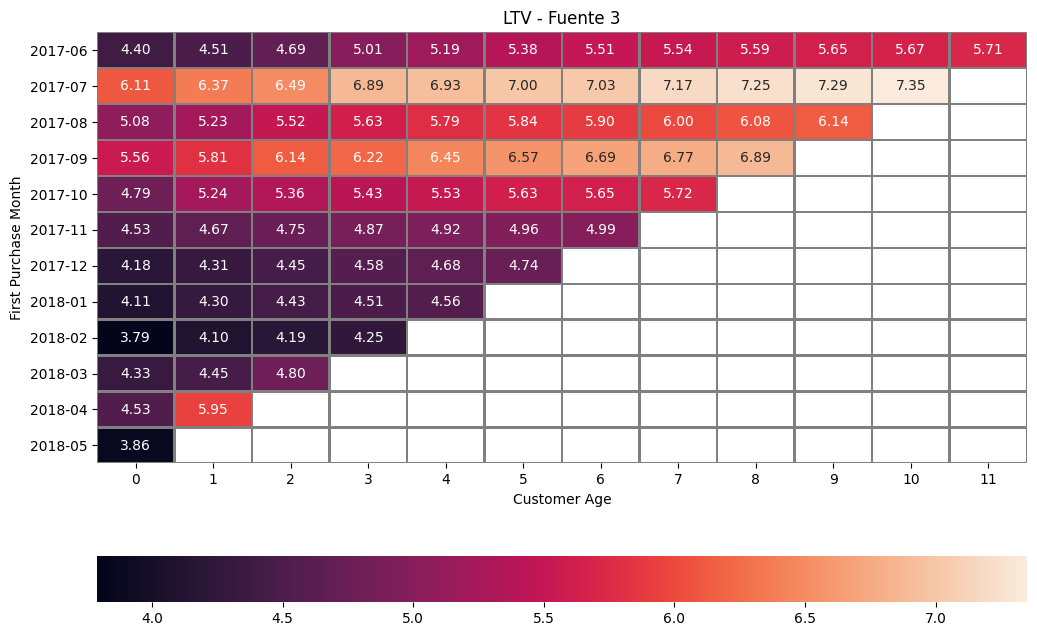

ROMI para la fuente 3: 0.005863789196192871


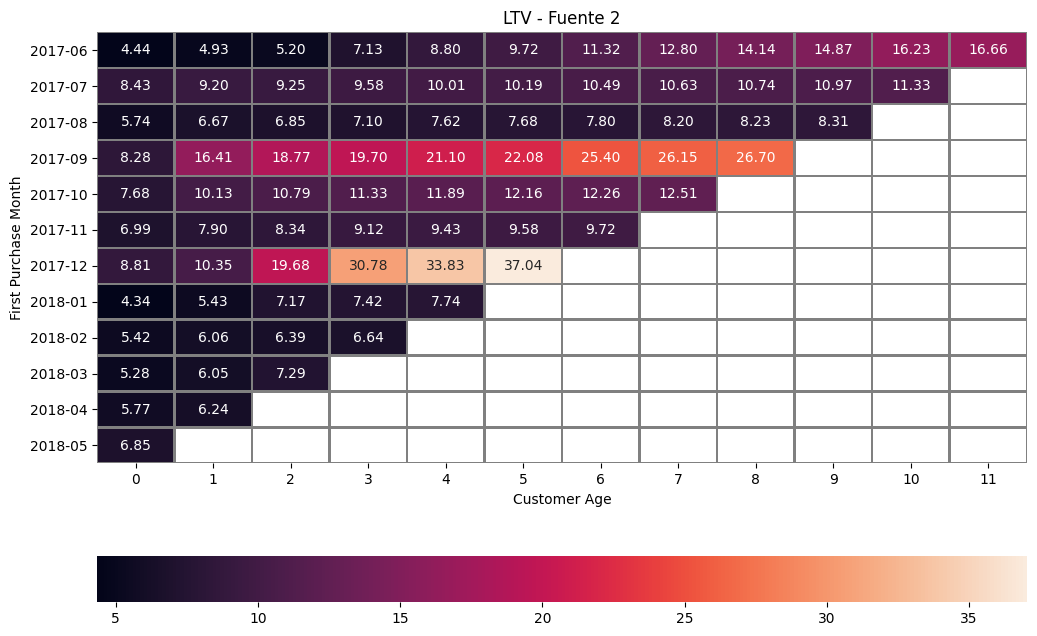

ROMI para la fuente 2: 0.0484191542567325


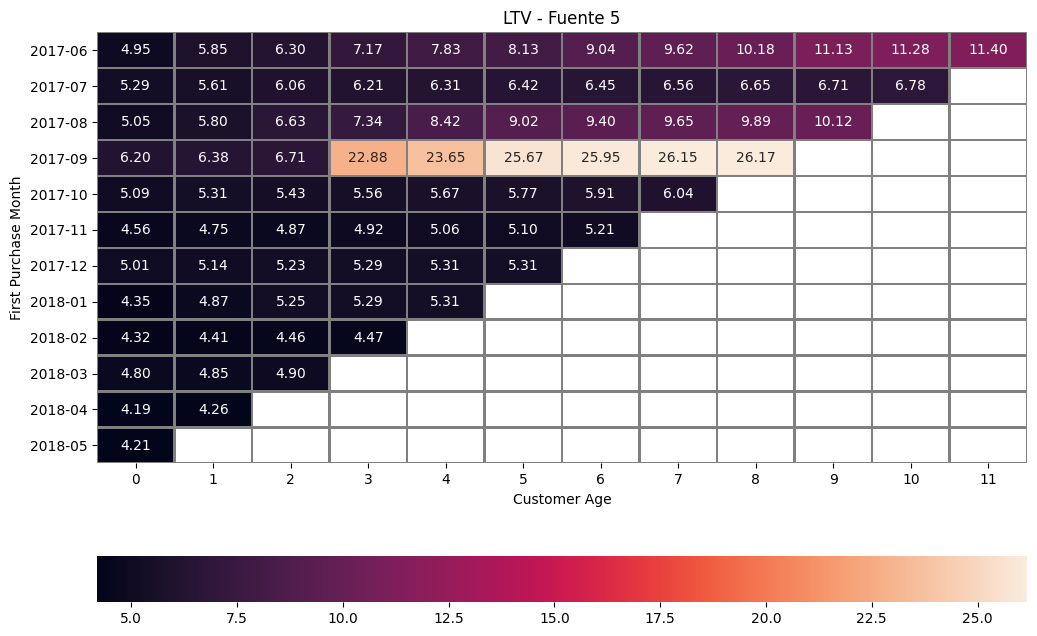

ROMI para la fuente 5: 0.05258058322152805


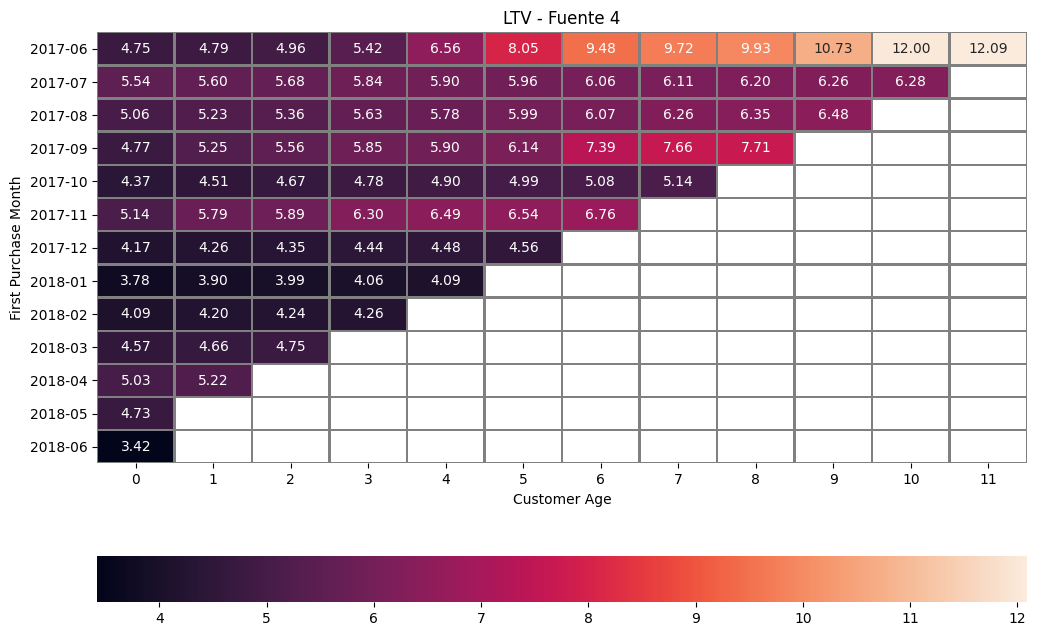

ROMI para la fuente 4: 0.04658931421770073


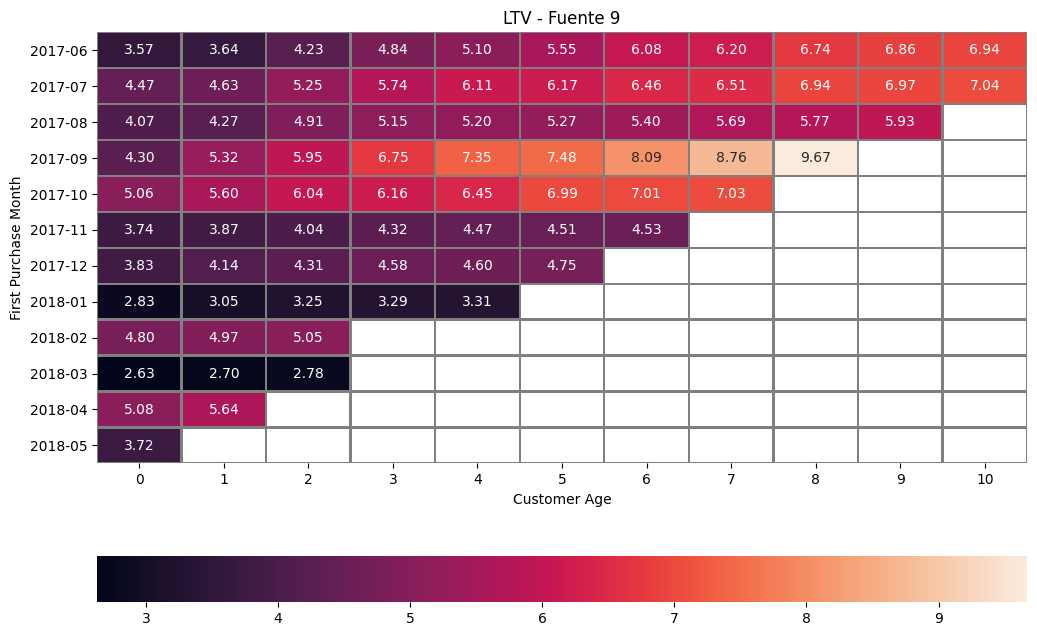

ROMI para la fuente 9: 0.02835466325935587


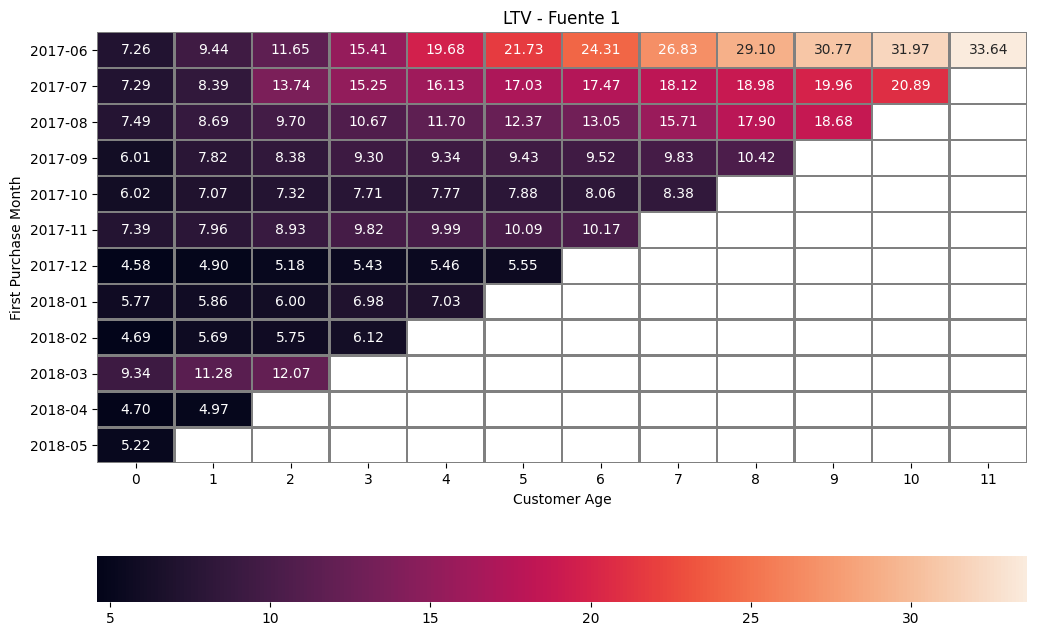

ROMI para la fuente 1: 0.06298504696228287


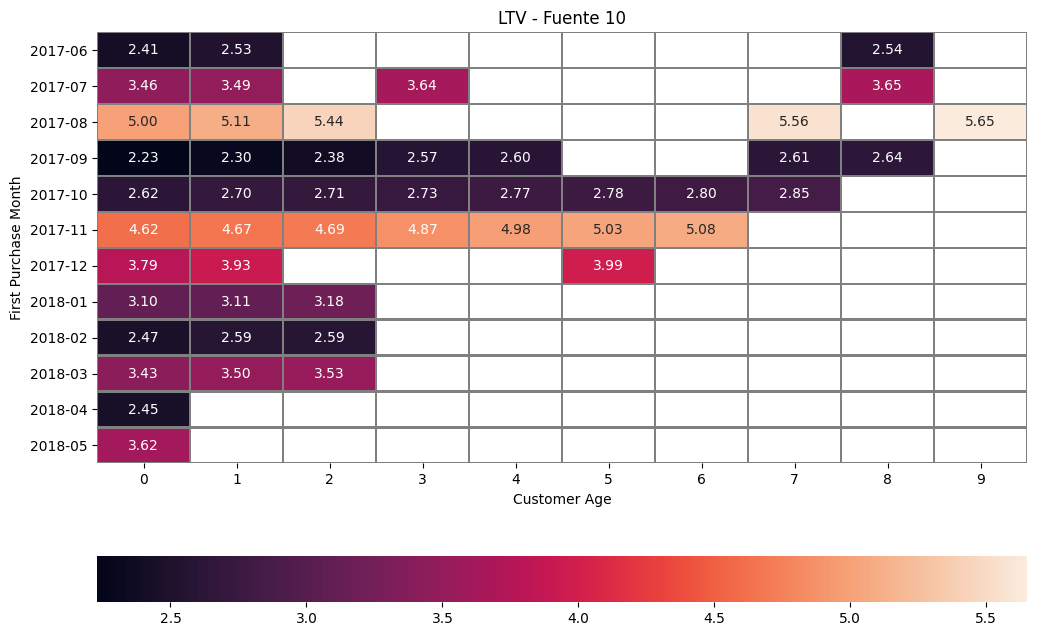

ROMI para la fuente 10: 0.005949555142930363
No hay datos suficientes para generar el heatmap para la fuente 6


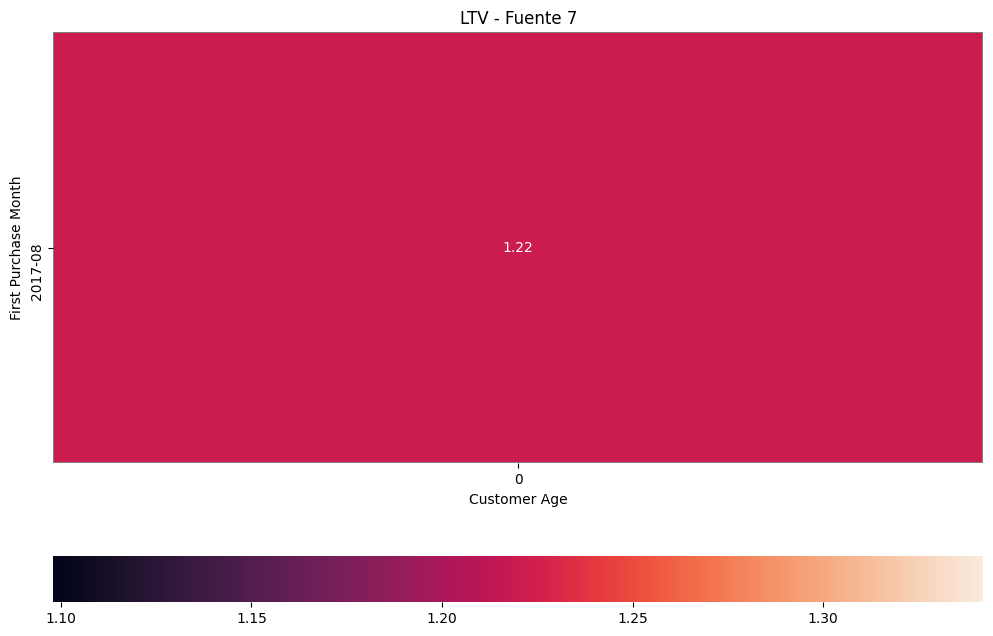

No se pudo calcular el ROMI para la fuente 7 debido a CAC nulo o cero.
ROMI para cada fuente:
   Source Id      ROMI
0          3  0.005864
1          2  0.048419
2          5  0.052581
3          4  0.046589
4          9  0.028355
5          1  0.062985
6         10  0.005950


In [23]:

# Convertir las columnas de tiempo a formato datetime
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

# Primera visita usuario
first_visit = visits.sort_values(by='Start Ts').groupby('Uid').first().reset_index()


romi_results = []

#FOR POR FUENTE
for source_id in first_visit['Source Id'].unique():
    source_users = first_visit[first_visit['Source Id'] == source_id]['Uid']
    
    source_orders = orders[orders['Uid'].isin(source_users)]
    
    if source_orders.empty:
        print(f"No hay datos suficientes para generar el heatmap para la fuente {source_id}")
        continue
    
    # Primer mes compra
    first_purchase_month = source_orders.groupby('Uid')['Buy Ts'].min().dt.to_period('M').reset_index()
    first_purchase_month.columns = ['Uid', 'First Purchase Month']
    
    # Union de los datos de datos
    source_orders = source_orders.merge(first_purchase_month, on='Uid', how='left')
    
    # Calcular la edad del cliente en meses
    source_orders['Customer Age'] = source_orders.apply(lambda row: (row['Buy Ts'].to_period('M') - row['First Purchase Month']).n, axis=1)
    
    #Tamano cohort
    cohort_counts = source_orders.groupby('First Purchase Month')['Uid'].nunique().reset_index()
    cohort_counts.columns = ['First Purchase Month', 'Cohort Size']
    
    # Calcular el LTV
    ltv_table = source_orders.groupby(['First Purchase Month', 'Customer Age'])['Revenue'].sum().reset_index()
    ltv_table = ltv_table.merge(cohort_counts, on='First Purchase Month', how='left')
    ltv_table['LTV'] = ltv_table['Revenue'] / ltv_table['Cohort Size']
    
    # Filtrar para obtener solo el LTV con 5 meses de edad
    ltv_5_months = ltv_table[ltv_table['Customer Age'] == 5]['LTV']

    # Calcular el LTV promedio de los clientes con 5 meses de edad
    average_ltv = ltv_5_months.mean()

    
    # Crear una tabla pivot para visualizar el LTV
    ltv_table_pivot = ltv_table.pivot_table(
        index='First Purchase Month',
        columns='Customer Age',
        values='LTV',
        aggfunc='sum'
    ).cumsum(axis=1)
    
    # Verificar si ltv_table_pivot tiene datos antes de intentar graficar
    if not ltv_table_pivot.empty:
        # Visualizar el LTV acumulado usando un heatmap
        ltv_table_pivot.index = ltv_table_pivot.index.astype(str)
        plt.figure(figsize=(12, 8))
        sns.heatmap(ltv_table_pivot.round(2), annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws={'orientation': 'horizontal'}).set(title=f'LTV - Fuente {source_id}')
        plt.show()
    else:
        print(f"No hay datos suficientes para generar el heatmap para la fuente {source_id}")
    

    #average_ltv = ltv_table['LTV'].mean()
    
    # Calcular el CAC para la fuente
    cac = merged_df[merged_df['Source Id'] == source_id]['costo_adquisicion_cliente'].mean()
    
    # Calcular el ROMI
    if cac and cac > 0:  # Asegurarse de que CAC no sea cero o nulo
        romi = average_ltv / cac
        romi_results.append({'Source Id': source_id, 'ROMI': romi})
        print(f"ROMI para la fuente {source_id}: {romi}")
    else:
        print(f"No se pudo calcular el ROMI para la fuente {source_id} debido a CAC nulo o cero.")

# Crear un DataFrame con los resultados de ROMI
romi_df = pd.DataFrame(romi_results)

print("ROMI para cada fuente:")
print(romi_df)




   

In [24]:
ltv_table_pivot[0].mean()

1.22

In [25]:
# Calcular el promedio de LTV para la fuente
average_ltv = ltv_table['LTV'].mean()
    
    # Calcular el CAC para la fuente
cac = merged_df[merged_df['Source Id'] == source_id]['costo_adquisicion_cliente'].mean()
    
    # Calcular el ROMI
if cac and cac > 0:  
    romi = average_ltv / cac
    romi_results.append({'Source Id': source_id, 'ROMI': romi})
    print(f"ROMI para la fuente {source_id}: {romi}")
else:
     print(f"No se pudo calcular el ROMI para la fuente {source_id} debido a CAC nulo o cero.")

# Crear un DataFrame con los resultados de ROMI
romi_df = pd.DataFrame(romi_results)

print("ROMI para cada fuente:")
print(romi_df)

No se pudo calcular el ROMI para la fuente 7 debido a CAC nulo o cero.
ROMI para cada fuente:
   Source Id      ROMI
0          3  0.005864
1          2  0.048419
2          5  0.052581
3          4  0.046589
4          9  0.028355
5          1  0.062985
6         10  0.005950


### Conclusion

Se puede ver que la inversion de marketing las fuentes no fue buena para ninguna fuente ya que ninguna supera el 1, es decir que no hubo buen retorno de inversion. 

Tambien se puede ver que hay mas ganancia de los usuarios que entran en septiembre, esto se ve reflejado sobretodo en el a partir del cohort 2 hasta el 7 siendo un tasa arriba del 11

Una estrategia que se podria aplicar es atacar las fechas de semptiembre donde se tiene mas ingresos, de esa forma estariamos actuando sobre las fechas mas importantes como lo puede ser la regla del pareto del 80/20, asi tambien como reducir los gastos en la fuente 3 y 4 pues es donde mas se ha gastado(recordemos que ninguna fuente se tuvo un buen retorno de inversion).